In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [3]:
# Load the CSV file
nba_data = pd.read_csv('nba-players.csv')

In [4]:
# Display general info and first few rows
nba_data.info()
print(nba_data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   1340 non-null   int64  
 1   name         1340 non-null   object 
 2   gp           1340 non-null   int64  
 3   min          1340 non-null   float64
 4   pts          1340 non-null   float64
 5   fgm          1340 non-null   float64
 6   fga          1340 non-null   float64
 7   fg           1340 non-null   float64
 8   3p_made      1340 non-null   float64
 9   3pa          1340 non-null   float64
 10  3p           1340 non-null   float64
 11  ftm          1340 non-null   float64
 12  fta          1340 non-null   float64
 13  ft           1340 non-null   float64
 14  oreb         1340 non-null   float64
 15  dreb         1340 non-null   float64
 16  reb          1340 non-null   float64
 17  ast          1340 non-null   float64
 18  stl          1340 non-null   float64
 19  blk   

In [5]:
# Descriptive statistics for rebounds-related columns
rebounds_stats = nba_data[['oreb', 'dreb', 'reb']].describe()
rebounds_stats

,oreb,dreb,reb
count,1340.000000,1340.000000,1340.000000
mean,1.009403,2.025746,3.034478
std,0.777119,1.360008,2.057774
min,0.000000,0.200000,0.300000
25%,0.400000,1.000000,1.500000
50%,0.800000,1.700000,2.500000
75%,1.400000,2.600000,4.000000
max,5.300000,9.600000,13.900000


/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


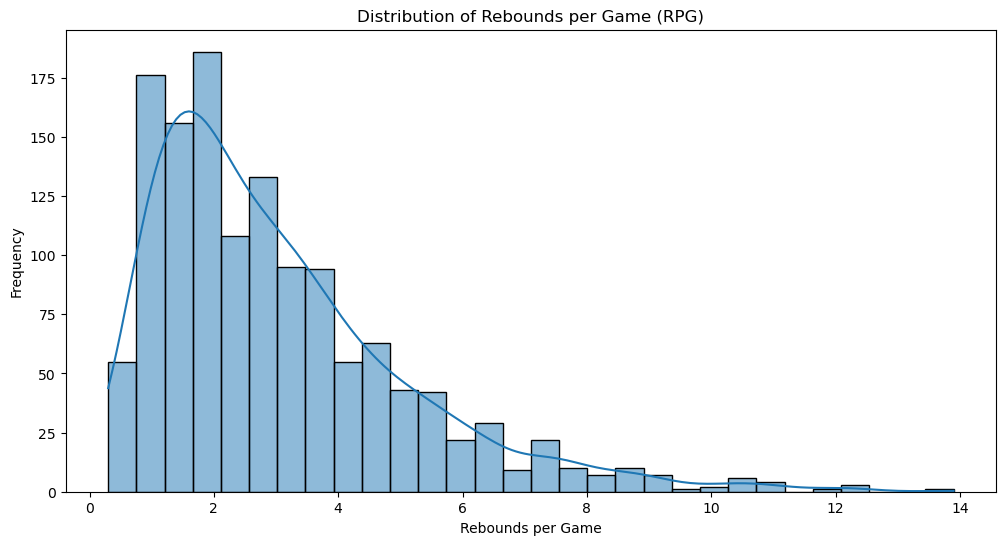

In [6]:
# Distribution plots for RPG (Total Rebounds per Game)
plt.figure(figsize=(12, 6))
sns.histplot(nba_data['reb'], kde=True)
plt.title('Distribution of Rebounds per Game (RPG)')
plt.xlabel('Rebounds per Game')
plt.ylabel('Frequency')
plt.show()

/Users/roshanchandru/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


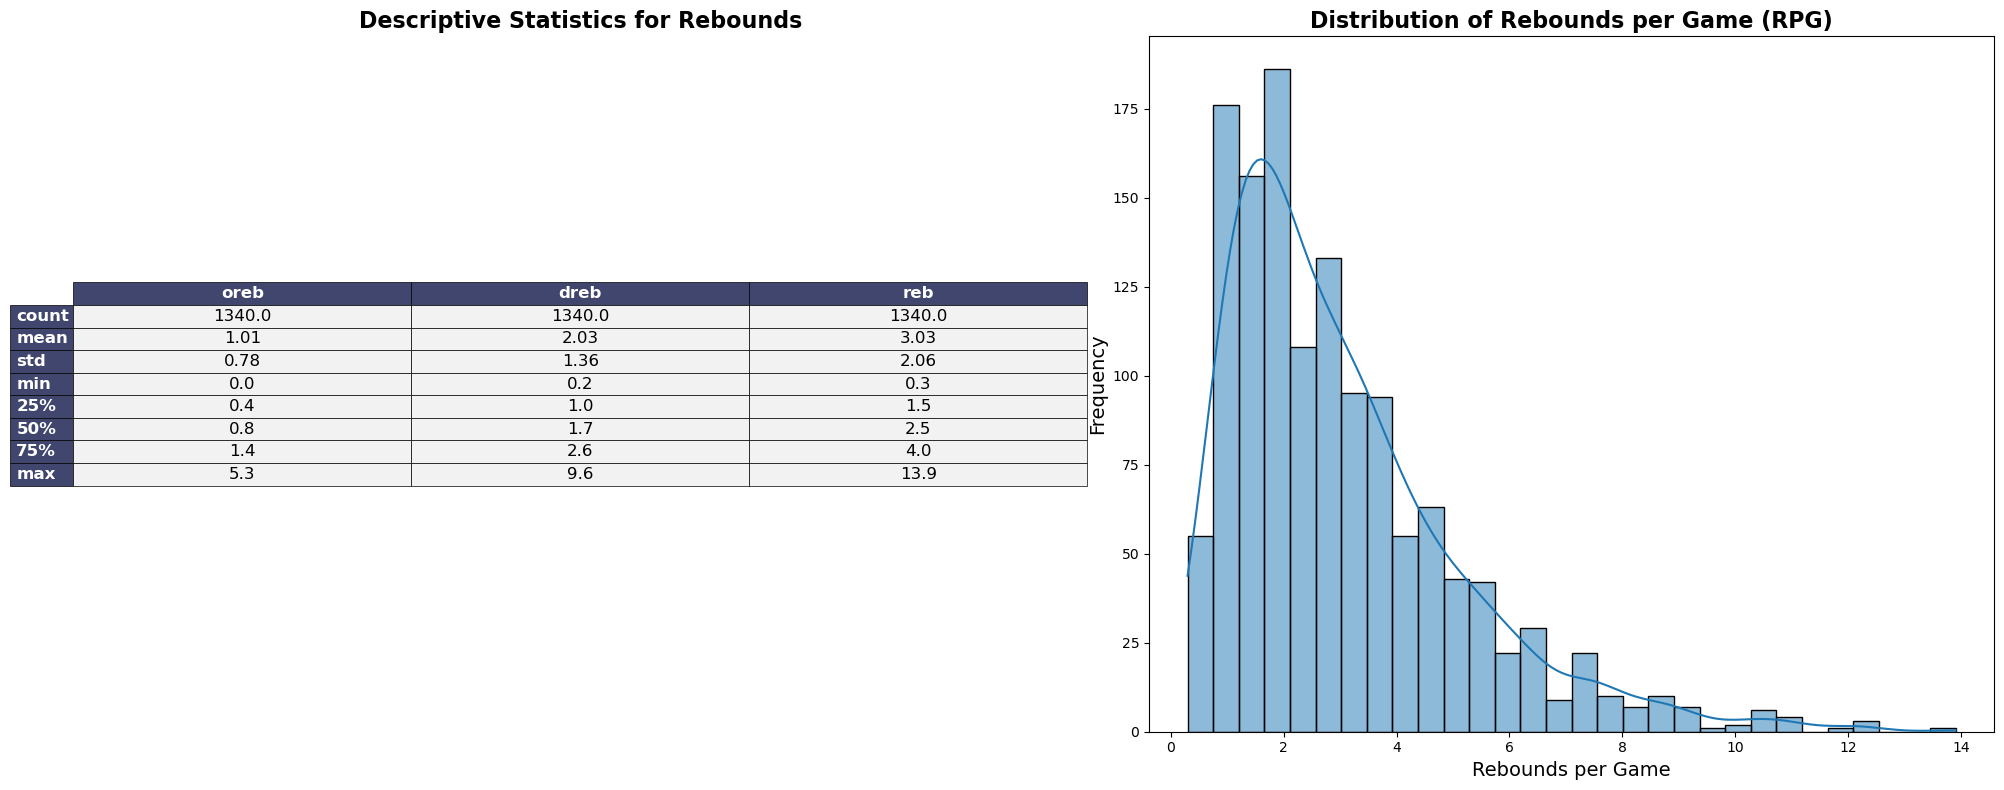

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Calculate descriptive statistics for rebounds-related columns
rebounds_stats = nba_data[['oreb', 'dreb', 'reb']].describe()

# Create a figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Display the descriptive statistics table on the first subplot
axes[0].axis('off')  # Turn off the axis

# Create the table
table = axes[0].table(cellText=rebounds_stats.values.round(2),  # Round values for better readability
                      colLabels=rebounds_stats.columns,
                      rowLabels=rebounds_stats.index,
                      cellLoc='center',
                      loc='center')

# Styling the table
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1.2, 1.2)

# Adding cell borders and color
for key, cell in table.get_celld().items():
    cell.set_linewidth(0.5)
    if key[0] == 0 or key[1] == -1:
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#40466e')  # Header color
    else:
        cell.set_facecolor('#f2f2f2')  # Body color

axes[0].set_title('Descriptive Statistics for Rebounds', fontsize=16, weight='bold')

# Distribution plot for RPG (Total Rebounds per Game)
sns.histplot(nba_data['reb'], kde=True, ax=axes[1])
axes[1].set_title('Distribution of Rebounds per Game (RPG)', fontsize=16, weight='bold')
axes[1].set_xlabel('Rebounds per Game', fontsize=14)
axes[1].set_ylabel('Frequency', fontsize=14)

# Adjust layout
plt.tight_layout()

plt.savefig('distribution.png')

# Show the plot
plt.show()


In [8]:
# Handle outliers by capping them at the 1st and 99th percentile
def cap_outliers(df, cols):
    for col in cols:
        lower_cap = df[col].quantile(0.01)
        upper_cap = df[col].quantile(0.99)
        df[col] = df[col].clip(lower_cap, upper_cap)
    return df

In [9]:
# List of columns to cap outliers
outlier_cols = ["pts", "fgm", "fga", "min", "3p_made", "ftm", "oreb", "dreb", "reb", "ast", "stl", "blk", "tov"]

# Cap outliers in the dataset
nba_data_capped = cap_outliers(nba_data.copy(), outlier_cols)

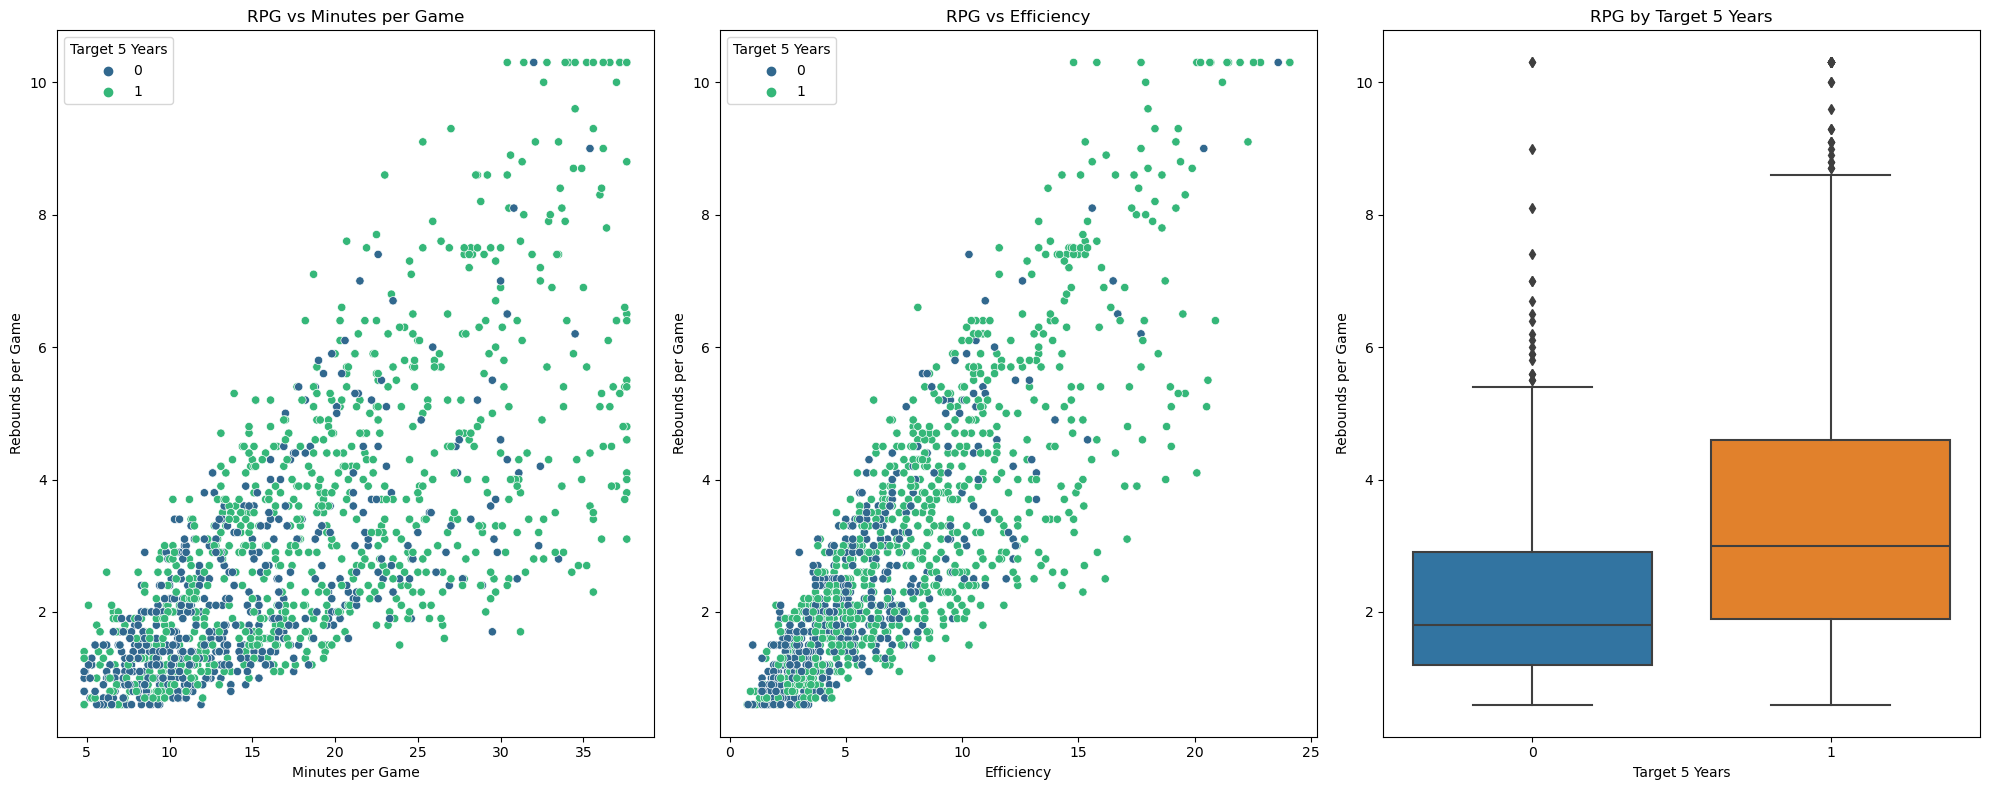

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 3 subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

# Scatter plot: RPG vs. Minutes per Game
sns.scatterplot(x='min', y='reb', hue='target_5yrs', data=nba_data_capped, palette='viridis', ax=axes[0])
axes[0].set_title('RPG vs Minutes per Game')
axes[0].set_xlabel('Minutes per Game')
axes[0].set_ylabel('Rebounds per Game')
axes[0].legend(title='Target 5 Years')

# Scatter plot: RPG vs. Efficiency
sns.scatterplot(x='efficiency', y='reb', hue='target_5yrs', data=nba_data_capped, palette='viridis', ax=axes[1])
axes[1].set_title('RPG vs Efficiency')
axes[1].set_xlabel('Efficiency')
axes[1].set_ylabel('Rebounds per Game')
axes[1].legend(title='Target 5 Years')

# Box plot: RPG by Target 5 Years
sns.boxplot(x='target_5yrs', y='reb', data=nba_data_capped, ax=axes[2])
axes[2].set_title('RPG by Target 5 Years')
axes[2].set_xlabel('Target 5 Years')
axes[2].set_ylabel('Rebounds per Game')

# Adjust layout
plt.tight_layout()

# Show the plot

plt.savefig('nba_plots.png')
plt.show()

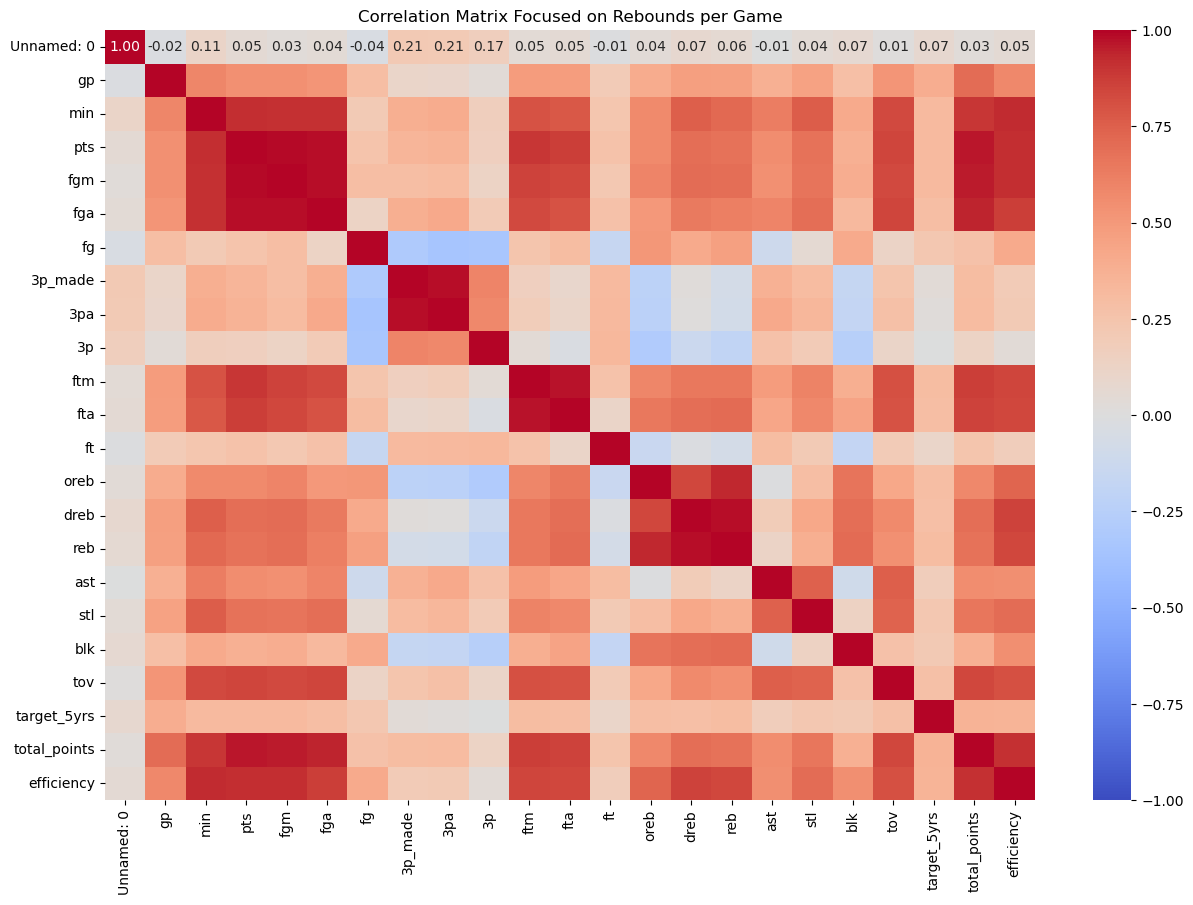

In [11]:
# Feature Engineering: Create additional features
nba_data_capped['total_points'] = nba_data_capped['pts'] * nba_data_capped['gp']
nba_data_capped['efficiency'] = (nba_data_capped['pts'] + nba_data_capped['reb'] + nba_data_capped['ast'] +
                                 nba_data_capped['stl'] + nba_data_capped['blk']) - (
                                 (nba_data_capped['fga'] - nba_data_capped['fgm']) +
                                 (nba_data_capped['fta'] - nba_data_capped['ftm']) + nba_data_capped['tov'])

# Exclude non-numeric columns for correlation matrix
numeric_cols = nba_data_capped.select_dtypes(include=[np.number]).columns
correlation_matrix_rebounds = nba_data_capped[numeric_cols].corr()
correlation_reb = correlation_matrix_rebounds['reb'].sort_values(ascending=False)

# Visualize the correlation matrix for rebounds
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix_rebounds, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix Focused on Rebounds per Game')
plt.show()

# Select features and target for prediction
features = ['min', 'efficiency', 'blk', 'fta', 'fgm', 'total_points', 'pts', 'ftm', 'fga', 'tov']
target = 'reb'

In [12]:
# Prepare the dataset
X = nba_data_capped[features]
y = nba_data_capped[target]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "MLP Regressor": MLPRegressor(random_state=42, max_iter=500)
}


In [13]:
# Train and evaluate models
results = []

for model_name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    # Make predictions
    y_pred = model.predict(X_test)
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    # Store the results
    results.append({
        "Model": model_name,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R2 Score": r2
    })

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)

                         Model       MSE      RMSE       MAE  R2 Score
0            Linear Regression  0.613293  0.783130  0.583437  0.866837
1      Random Forest Regressor  0.667926  0.817267  0.585086  0.854974
2  Gradient Boosting Regressor  0.628172  0.792573  0.589644  0.863606
3        K-Neighbors Regressor  2.176463  1.475284  1.124030  0.527428
4                MLP Regressor  0.808859  0.899366  0.667449  0.824373


In [35]:
# Hyperparameter Tuning with Grid Search

# Define the parameter grid for Linear Regression
lr_params = {
    'fit_intercept': [True, False],
}

# Define the parameter grid for Gradient Boosting Regressor
gbr_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 4]
}

# Initialize Grid Search for Linear Regression
lr_grid_search = GridSearchCV(estimator=LinearRegression(), param_grid=lr_params, cv=5, scoring='r2')
lr_grid_search.fit(X_train, y_train)
best_lr = lr_grid_search.best_estimator_

# Initialize Grid Search for Gradient Boosting Regressor
gbr_grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=gbr_params, cv=5, scoring='r2')
gbr_grid_search.fit(X_train, y_train)
best_gbr = gbr_grid_search.best_estimator_

In [36]:
# Evaluate the best models on the test set
best_models = {
    "Best Linear Regression": best_lr,
    "Best Gradient Boosting Regressor": best_gbr
}

best_results = []

for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    best_results.append({
        "Model": model_name,
        "MSE": mse,
        "RMSE": rmse,
        "MAE": mae,
        "R2 Score": r2
    })

# Convert best results to DataFrame for better visualization
best_results_df = pd.DataFrame(best_results)
print(best_results_df)

                              Model       MSE      RMSE       MAE  R2 Score
0            Best Linear Regression  0.613293  0.783130  0.583437  0.866837
1  Best Gradient Boosting Regressor  0.576118  0.759025  0.571106  0.874908
